In [1]:
%matplotlib inline
import imageio as io
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from pathlib import Path
data_dir = Path('clipped')
img_dir_names = os.listdir(str(data_dir))

In [4]:
img_clips = []
mask_clips = []
for imgdir in img_dir_names:
    img_imgdir = data_dir/imgdir/'img'
    mask_imgdir = data_dir/imgdir/'mask'
    for img_name in os.listdir(str(img_imgdir)):
        img_clips.append(io.imread(str(img_imgdir/img_name)))
        mask_file = os.path.splitext(str(mask_imgdir/img_name))[0] + '_mask.png'
        mask_clips.append(io.imread(mask_file))

In [5]:
print(len(img_clips))
print(len(mask_clips))

1533
1533


In [6]:
import random

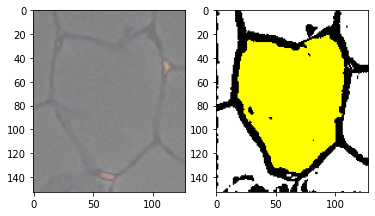

In [24]:
idx = random.randrange(0,len(img_clips))
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.imshow(img_clips[idx])
ax = fig.add_subplot(1,2,2)
ax.imshow(mask_clips[idx])
plt.show()

In [53]:
bool_clips = []
CELL = (255,255,0)
for mc in mask_clips:
    bool_clips.append((mc==CELL).all(axis=-1).astype(np.float32))

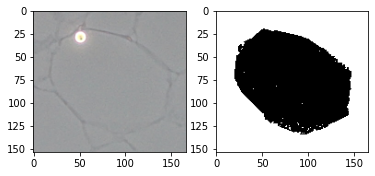

In [58]:
idx = random.randrange(0,len(img_clips))
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.imshow(img_clips[idx])
ax = fig.add_subplot(1,2,2)
ax.imshow(bool_clips[idx], cmap='binary')
plt.show()

In [59]:
import albumentations as A

In [60]:
aug = A.Resize(200,200)

In [61]:
resized_img = []
resized_mask = []
for img, mask in zip(img_clips,bool_clips):
    resized=aug(image=img, mask=mask)
    resized_img.append(resized['image'])
    resized_mask.append(resized['mask'])

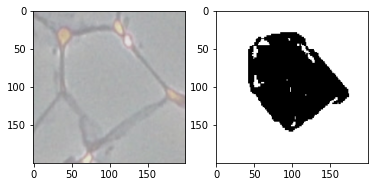

In [82]:
idx = random.randrange(0,len(resized_img))
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.imshow(resized_img[idx])
ax = fig.add_subplot(1,2,2)
ax.imshow(resized_mask[idx], cmap='binary')
plt.show()

In [83]:
img_data = np.array(resized_img)
resized_mask = np.array(resized_mask)

In [87]:
print(img_data.shape)
print(img_data.dtype)
print(resized_mask.shape)
print(np.any(np.logical_and(resized_mask!=1,resized_mask!=0)))

(1533, 200, 200, 3)
uint8
(1533, 200, 200)
False


In [88]:
np.savez_compressed('cell_mask_data',img=img_data, mask=resized_mask)